# Import Libraries

In [285]:
from urllib.request import urlretrieve
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load dataset

In [286]:
# URL for hypothermia dataset: 
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'
#Download file

raw_data = urlopen(url)

In [287]:
#Read the csv into a dataframe
headers = ['L-CORE','L-SURF','L-02','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','ADM-DECS']
df = pd.read_csv(raw_data,names = headers, comment = '#')
df.head()

,L-CORE,L-SURF,L-02,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


# Preprocessing

## Convert missing '?' values to NaN

In [288]:
df.COMFORT = df.COMFORT.apply(pd.to_numeric, errors = 'coerce')

In [289]:
#Check to see if the ? values in Comfort were converted to NaN. Null count for comfort should equal 3.
df.isnull().sum()

L-CORE       0
L-SURF       0
L-02         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      3
ADM-DECS     0
dtype: int64

## Impute missing 'NaN' Data by dropping columns (DO NOT USE THIS APPROACH)

In [290]:
#Drop each row where comfort level is nan
df1 = df;
df1.dropna(axis=0);

## Impute missing 'NaN' data by mean

Need to import IMPUTER from sklearn.preprocessing. Will use an imputing kernel looking for 'NaN' along axis=0 and replace these values with the mean using imp.fit_transform and numpy ravel.

In [291]:
#Import imputer
from sklearn.preprocessing import Imputer

#Set up imp 'kernel' and use it to replace 'NaN' values 
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#Use numpy ravel and .fit_transform to replace 'NaN' values with mean comfort level.
df["COMFORT"] = imp.fit_transform(df[["COMFORT"]]).ravel()


Check df to see if NaN values are replaced (one of them at patient 70)

In [292]:
#Check comfort at index 70, which was one spot that had been 'NaN'
df["COMFORT"][70]

10.942528735632184

# Plot Each Feature Against Comfort

## Comfort vs. L-CORE

In [293]:
import seaborn as sns
%matplotlib inline
#to plot the graphs inline on jupyter notebook

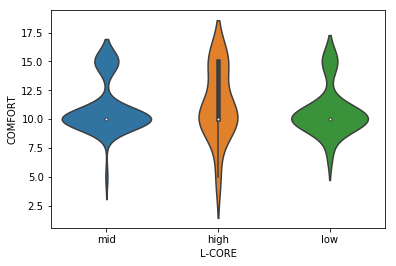

In [294]:
#Use seaborne, plot Comfort against L-CORE values
sns.violinplot(x=df['L-CORE'],y=df['COMFORT'])

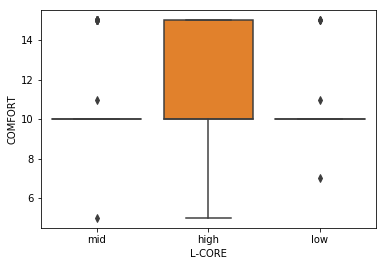

In [295]:
sns.boxplot(x=df['L-CORE'],y=df['COMFORT'])

The boxplot of Comfort vs. L-CORE shows that patients with high internal temperatures had an IQR of comfort responses that stretched above 10, with a lower whisker response of 5. This variability of responses for high L-CORE is better illustrated in the violin plot. In contrast to high L-CORE, the boxplot shows both the mid- and low-L-CORE groups have similar IQRs that lies on a comfort level of 10 with outliers above and below the IQR. 

## COMFORT vs. L-SURF

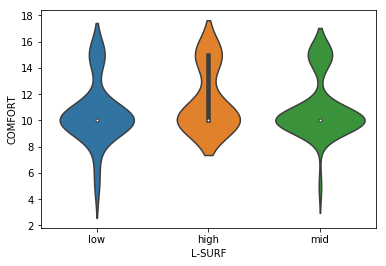

In [296]:
sns.violinplot(x=df['L-SURF'],y=df['COMFORT'])

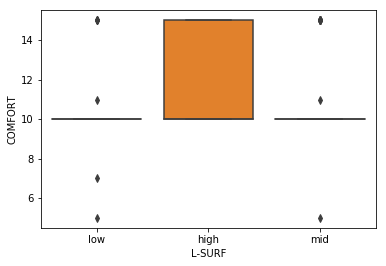

In [297]:
sns.boxplot(x=df['L-SURF'],y=df['COMFORT'])

The Comfort vs. L-SURF boxplot shows that patients with high (>36.5) surface temperatures have an IQR that stretches above comfort level 10. From the boxplot, patients with mid (>= 36.5 and <= 35) and low (< 35) surface temperatures have show similar distributions of comfort level scores, with the low L-SURF group being skewed slightly more left than the mid L-SURF group. The violin plot shows high L-SURF patients generally reported comfort level scores >= 7.


## COMFORT vs. L-02

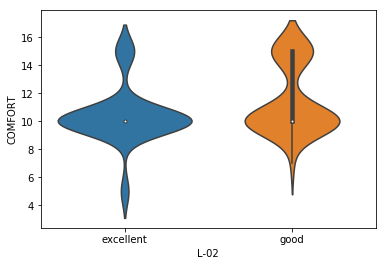

In [298]:
sns.violinplot(x=df['L-02'],y=df['COMFORT'])

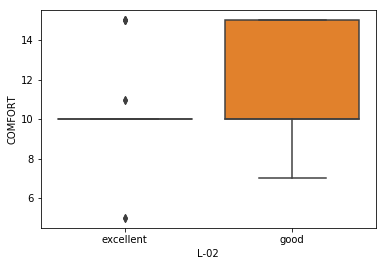

In [299]:
sns.boxplot(x=df['L-02'],y=df['COMFORT'])

Both the violin plot and boxplot of L-O2 vs. Comfort show a negative correlation in the reported comfort score when moving from good O2 saturation to excellent O2 saturation (excellent (>= 98), good (>= 90 and < 98)). That is, patients with good O2 saturation had a distribution of comfort level scores that was skewed more rightward than those with excellent O2 saturation. 

## COMFORT vs. L-BP

First show violin plot to show distribution

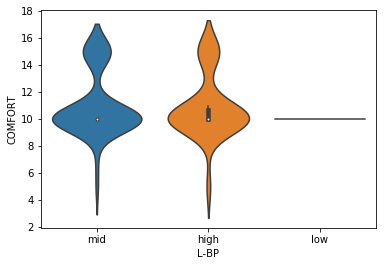

In [300]:
sns.violinplot(x=df['L-BP'],y=df['COMFORT'])

Violin plot shows that comfort level for L-BP has mean of 10, with all points lying on the mean. This plot does not give much information in regards to the number of points per comfort level, so add a swarm plot for better visualization

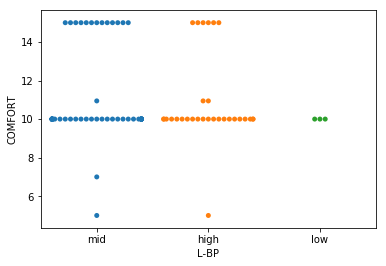

In [301]:
sns.swarmplot(x=df['L-BP'],y=df['COMFORT'])

Swarm plot able to show that there were only 3 patients under the "low" subcategory of the L-BP feature. If one were to only look at a boxplot or violin plot of this data, this information would not be represented. 

The violin plot shows that patients under the mid- and high- L-BP subcategories had similar distributions of reported comfort levels.

## COMFORT vs. SURF-STBL

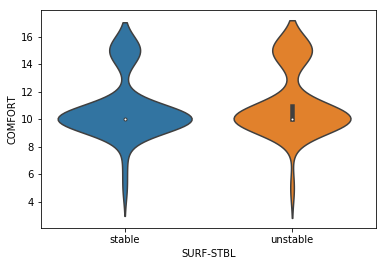

In [302]:
sns.violinplot(x=df['SURF-STBL'],y=df['COMFORT'])

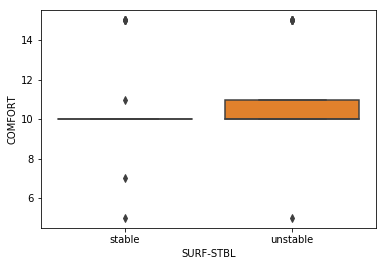

In [311]:
sns.boxplot(x=df['SURF-STBL'],y=df['COMFORT'])

The violin and boxplots of surface temperature stability vs. comfort level show 1) there were no patients with moderate stability, and 2) the distribution of comfort scores for both the stable and unstable SURF-STBL groups were similar, with the unstable group having an IQR slightly larger (and extending towards higher comfort levels) than the stable group.

## COMFORT vs. CORE-STBL

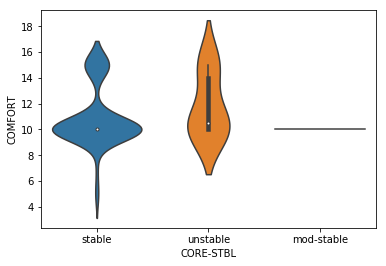

In [303]:
sns.violinplot(x=df['CORE-STBL'],y=df['COMFORT'])

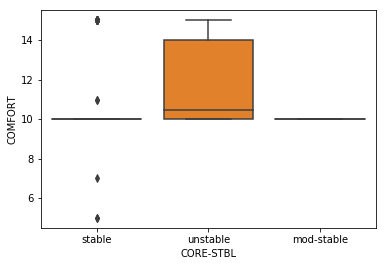

In [304]:
sns.boxplot(x=df['CORE-STBL'],y=df['COMFORT'])

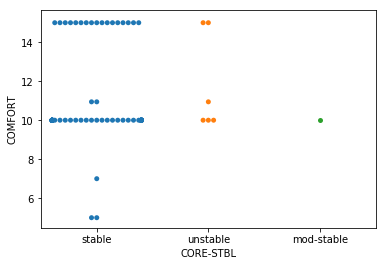

In [312]:
sns.swarmplot(x=df['CORE-STBL'],y=df['COMFORT'])

The swarmplot shows only one patient was classified under the mod-stable category of CORE-STBL. Most patients in this feature lied in the 'stable' subcategory and their comfort levels were skewed right, with an IQR on 10. The 'stable' subcategory had few datapoints, but the boxplot of this subcategory showed a comfort level distribution skewed right (above 10).

## COMFORT vs. BP-STBL

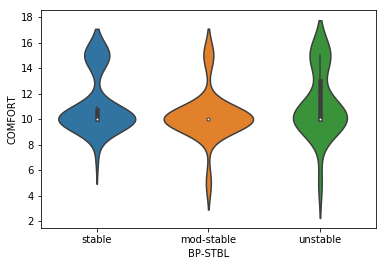

In [305]:
sns.violinplot(x=df['BP-STBL'],y=df['COMFORT'])

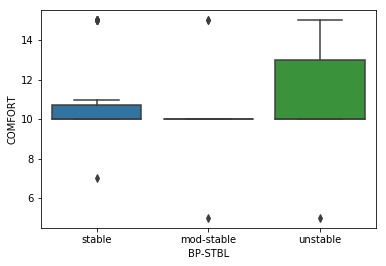

In [306]:
sns.boxplot(x=df['BP-STBL'],y=df['COMFORT'])

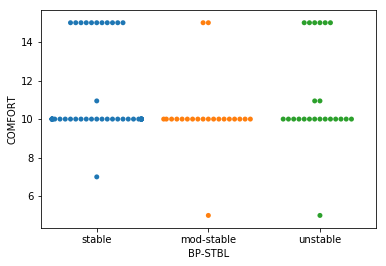

In [313]:
sns.swarmplot(x=df['BP-STBL'],y=df['COMFORT'])

The swarmplot shows that there are a similar number of datapoints in each subcategory of BP-STBL. The boxplot shows that patients in the unstable BP-STBL sub-group had a distribution in reported comfort levels with a larger IQR than the 'stable' and 'mod-stable' groups. Additionally, the reported comfort level distribution of the'unstable' BP-STBL population is skewed right. 

This means that many patients with unstable blood pressure had a perceived comfort level of 10 or higher at discharge, which is comparatively larger than 'stable' and 'mod-stable' patients (although not necessarily statistically significant). Although the trends appear this way, it's difficult to draw accurate inference on the statistical significance due to sample size in each sub-group (i.e. stable, mod-stable, stable).

## Comfort vs. ADM-DECS

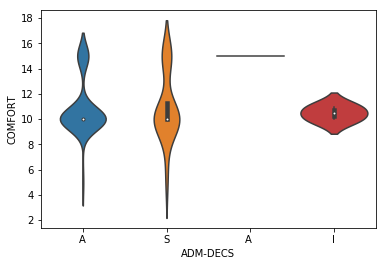

In [307]:
sns.violinplot(x=df['ADM-DECS'],y=df['COMFORT'])

There is one redundant variable on the x-axis: 'A '. This needs to be replaced with 'A' and then replotted.

In [308]:
#First must remove the 'A ' and replace it with 'A' so that only 3 variables appear on x-axis
df["ADM-DECS"] = df["ADM-DECS"].replace(["A "], ["A"])

Now make violinplot and boxplot for the adjusted ADM-DECS vs. Comfort

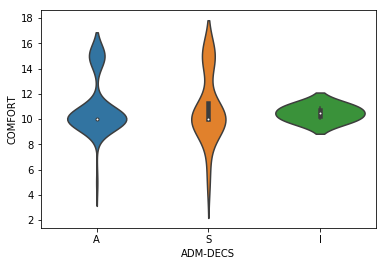

In [309]:
sns.violinplot(x=df['ADM-DECS'],y=df['COMFORT'])

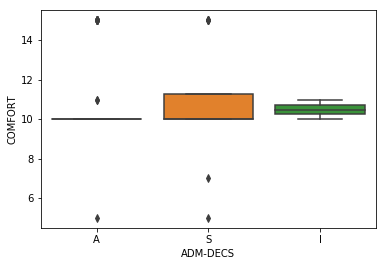

In [310]:
sns.boxplot(x=df['ADM-DECS'],y=df['COMFORT'])

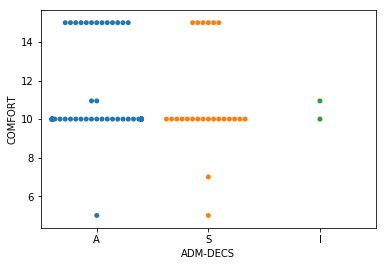

In [314]:
sns.swarmplot(x=df['ADM-DECS'],y=df['COMFORT'])

Boxplot better visualizes the IQR for the patients reported levels of comfort in the 'I' subcategory of ADM-DECS. Swarmplot shows that there are too few datapoints in number of patients sent to the ICU 'I' to infer on the relationship of comfort to ICU admission. Patients prepared to go home ('S') and patients sent to the general hospital floor ('A') had similar distributions of perceived comfort levels upon discharge.